In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
data = pd.read_excel(r"F:\0_个人学习\3_数据分析与挖掘\2_案例实战\AI之房产信息分析\beike_find_house - 副本.xlsx", header=None)

In [3]:
data.columns = ['区/县','区域','小区','总价','单价','房屋户型','楼层','总面积','户型结构','套内面积','建筑类型','朝向','建筑结构','装修情况','梯户比例','供暖方式','配备电梯','产权年限','s','交易权属','u','形式','是否满五','产权形式','是否有房本','小区均价','小区建成','style','总栋数'] 

In [4]:
data.head()

,区/县,区域,小区,总价,单价,房屋户型,楼层,总面积,户型结构,套内面积,...,交易权属,u,形式,是否满五,产权形式,是否有房本,小区均价,小区建成,style,总栋数
0,朝阳,东坝,奥林匹克花园四期,760.0,54453.0,3室1厅2卫,低楼层(共10层),139.57㎡,平层,124.91㎡,...,商品房,40679,普通住宅,满五年,共有,已上传房本照片,\n60708元/㎡\n,2009年建成,板楼/塔板结合,23栋
1,顺义,顺义城,石园北区,439.0,33082.1,3室1厅2卫,低楼层(共16层),132.7㎡,平层,107.19㎡,...,商品房,41912,普通住宅,满五年,非共有,已上传房本照片,\n34244元/㎡\n,1996年建成,塔楼/板楼,79栋
2,门头沟,滨河西区,葡东小区,168.0,22547.3,2室2厅1卫,地下室(共6层),74.51㎡,平层,板楼,...,商品房,43362,普通住宅,暂无数据,共有,已上传房本照片,\n31881元/㎡\n,1995年建成,板楼,28栋
3,房山,良乡,聪慧里,165.0,28080.3,2室1厅1卫,高楼层(共6层),58.76㎡,平层,板楼,...,已购公房,42852,普通住宅,满两年,非共有,已上传房本照片,\n30619元/㎡\n,1992年建成,板楼,3栋
4,海淀,清河,强佑清河新城,442.0,68000.0,2室1厅1卫,中楼层(共27层),65㎡,平层,52.98㎡,...,商品房,40995,普通住宅,满五年,共有,已上传房本照片,\n66372元/㎡\n,2007年建成,塔楼/板楼/塔板结合,12栋


In [5]:
# 数据清洗
data['装修情况'] = data.apply(lambda x:x['建筑类型'] if ('南北' in str(x['户型结构'])) else x['装修情况'],axis=1)

data['建筑结构'] = data.apply(lambda x:x['套内面积'] if ('南北' in str(x['户型结构'])) else x['建筑结构'],axis=1)

data['朝向'] = data.apply(lambda x:x['户型结构'] if ('南北' in str(x['户型结构'])) else x['朝向'],axis=1)

data['套内面积'] = data.apply(lambda x:'㎡' if ('南北' in str(x['户型结构'])) else x['套内面积'],axis=1)

data['装修情况'] = data.apply(lambda x:x['朝向'] if ('㎡' in str(x['户型结构'])) else x['装修情况'],axis=1)

data['建筑结构'] = data.apply(lambda x:x['建筑类型'] if ('㎡' in str(x['户型结构'])) else x['建筑结构'],axis=1)

data['朝向'] = data.apply(lambda x:x['套内面积'] if ('㎡' in str(x['户型结构'])) else x['朝向'],axis=1)

data['套内面积'] = data.apply(lambda x:'㎡' if ('㎡' in str(x['户型结构'])) else x['套内面积'],axis=1)

data['套内面积'] = data.apply(lambda x:'㎡' if ('暂无数据' in str(x['套内面积'])) else x['套内面积'],axis=1)

data['装修情况'] = data.apply(lambda x:x['装修情况'] if ('㎡' in str(x['套内面积'])) else x['建筑结构'],axis=1)

data['建筑结构'] = data.apply(lambda x:x['建筑结构'] if ('㎡' in str(x['套内面积'])) else x['朝向'],axis=1)

data['朝向'] = data.apply(lambda x:x['朝向'] if ('㎡' in str(x['套内面积'])) else x['建筑类型'],axis=1)

data['建筑类型'] = data.apply(lambda x:x['建筑类型'] if ('㎡' in str(x['套内面积'])) else x['套内面积'],axis=1)

data['套内面积'] = data.apply(lambda x:x['套内面积'] if ('㎡' in str(x['套内面积'])) else '无信息',axis=1)

data['装修情况'] = data.apply(lambda x:x['建筑结构'] if (('户') in str(x['装修情况'])) else x['装修情况'],axis=1)

data['建筑结构'] = data.apply(lambda x:x['朝向'] if (('户') in str(x['装修情况'])) else x['建筑结构'],axis=1)

data['朝向'] = data.apply(lambda x:x['建筑类型'] if (('户') in str(x['装修情况'])) else x['朝向'],axis=1)

data['建筑结构'] = data.apply(lambda x:x['朝向'] if ('结构' in str(x['朝向'])) else x['建筑结构'],axis=1)

data['朝向'] = data.apply(lambda x:x['建筑类型'] if ('结构' in str(x['朝向'])) else x['朝向'],axis=1)

data['总楼层'] = data.apply(lambda x:str(x[6])[3:].strip('(共').strip('层)'),axis=1)
data['楼层'] = data.apply(lambda x:str(x[6])[:3],axis=1)
data['总面积'] = data.apply(lambda x:str(x[7]).strip('㎡'),axis=1)
data['小区均价'] = data.apply(lambda x:str(x[-5]).strip('元/㎡\n').strip('\n'),axis=1)
data['小区建成'] = data.apply(lambda x:str(x[-4])[:4],axis=1)
data['总栋数'] = data.apply(lambda x:str(x[-2])[:-1],axis=1)

In [6]:
data.to_csv('after_deal_data.csv',encoding='utf_8_sig')

In [7]:
need_data = data[['区/县','区域','小区','总价','单价','房屋户型','楼层','总面积','朝向','建筑结构','装修情况','交易权属','形式','是否满五','产权形式','是否有房本','小区均价','小区建成','总栋数']] 

In [8]:
need_data.head()

,区/县,区域,小区,总价,单价,房屋户型,楼层,总面积,朝向,建筑结构,装修情况,交易权属,形式,是否满五,产权形式,是否有房本,小区均价,小区建成,总栋数
0,朝阳,东坝,奥林匹克花园四期,760.0,54453.0,3室1厅2卫,低楼层,139.57,南北,钢混结构,精装,商品房,普通住宅,满五年,共有,已上传房本照片,60708,2009,23
1,顺义,顺义城,石园北区,439.0,33082.1,3室1厅2卫,低楼层,132.7,南北,混合结构,简装,商品房,普通住宅,满五年,非共有,已上传房本照片,34244,1996,79
2,门头沟,滨河西区,葡东小区,168.0,22547.3,2室2厅1卫,地下室,74.51,南,混合结构,精装,商品房,普通住宅,暂无数据,共有,已上传房本照片,31881,1995,28
3,房山,良乡,聪慧里,165.0,28080.3,2室1厅1卫,高楼层,58.76,南北,混合结构,简装,已购公房,普通住宅,满两年,非共有,已上传房本照片,30619,1992,3
4,海淀,清河,强佑清河新城,442.0,68000.0,2室1厅1卫,中楼层,65,东南,钢混结构,精装,商品房,普通住宅,满五年,共有,已上传房本照片,66372,2007,12


In [9]:
need_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 19 columns):
区/县      2950 non-null object
区域       2950 non-null object
小区       2950 non-null object
总价       2950 non-null float64
单价       2950 non-null float64
房屋户型     2950 non-null object
楼层       2950 non-null object
总面积      2950 non-null object
朝向       2950 non-null object
建筑结构     2950 non-null object
装修情况     2950 non-null object
交易权属     2950 non-null object
形式       2950 non-null object
是否满五     2950 non-null object
产权形式     2950 non-null object
是否有房本    2950 non-null object
小区均价     2950 non-null object
小区建成     2950 non-null object
总栋数      2950 non-null object
dtypes: float64(2), object(17)
memory usage: 438.0+ KB


In [10]:
need_data.describe()

,总价,单价
count,2950.000000,2950.000000
mean,451.843525,51352.566339
std,253.832985,19444.434781
min,115.000000,13802.300000
25%,294.250000,37811.425000
50%,388.000000,47956.100000
75%,518.000000,60914.850000
max,2530.000000,153571.000000


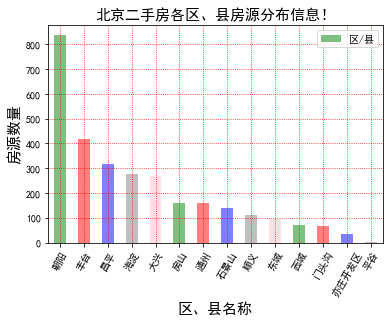

In [11]:
#  图表中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
fig, ax=plt.subplots()

'''
各区县房源分布情况！！！
'''
need_data['区/县'].value_counts().plot(kind='bar',color=['green','red','blue','grey','pink'],alpha=0.5)
plt.title('北京二手房各区、县房源分布信息！',fontsize=15)
plt.xlabel('区、县名称',fontsize=15)
plt.ylabel('房源数量',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.xticks(rotation=60)
plt.legend()
plt.show()

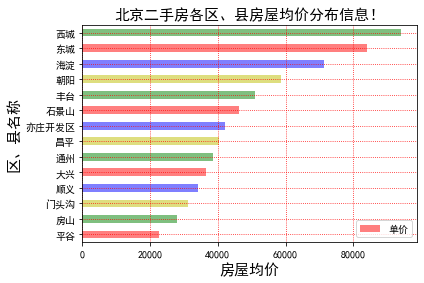

In [12]:
'''
各区县房源均价分布情况！！！
'''
need_data.groupby('区/县').mean()['单价'].sort_values(ascending=True).plot(kind='barh',color=['r','g','y','b'],alpha=0.5)
plt.title('北京二手房各区、县房屋均价分布信息！',fontsize=15)
plt.xlabel('房屋均价',fontsize=15)
plt.ylabel('区、县名称',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.legend()
plt.show()

2室1厅1卫    1571
3室1厅1卫     429
1室1厅1卫     239
3室2厅2卫     191
3室1厅2卫     165
2室2厅1卫     151
2室1厅2卫      50
3室2厅1卫      44
2室2厅2卫      34
4室2厅2卫      18
4室1厅2卫      15
1室0厅1卫       9
1室2厅1卫       6
4室2厅3卫       6
4室1厅1卫       4
3室2厅3卫       4
1室1厅2卫       3
2室0厅1卫       3
3室1厅3卫       2
5室2厅4卫       1
3室0厅1卫       1
1室0厅0卫       1
5室2厅2卫       1
4室1厅3卫       1
1室0厅2卫       1
Name: 房屋户型, dtype: int64


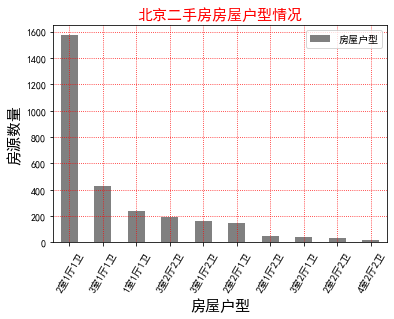

In [13]:
'''
房屋户型情况
'''
room_style = need_data['房屋户型'].value_counts()
print(room_style)
need_data['房屋户型'].value_counts()[:10].plot(kind='bar',color='grey')
plt.title('北京二手房房屋户型情况',fontsize=15,color='red')
plt.xlabel('房屋户型',fontsize=15)
plt.ylabel('房源数量',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.legend()
plt.xticks(rotation=60)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
plt.show()

In [69]:
need_data[need_data.房屋户型 == '5室2厅4卫']

,区/县,区域,小区,总价,单价,房屋户型,楼层,总面积,朝向,建筑结构,装修情况,交易权属,形式,是否满五,产权形式,是否有房本,小区均价,小区建成,总栋数
840,东城,天坛,金鱼池中区,770.0,54695.3,5室2厅4卫,低楼层,140.78,南北,钢混结构,精装,私产,普通住宅,满五年,非共有,已上传房本照片,76774,1978,19


In [15]:
# 北京二手房总价最大、最小值及其房源信息
total_price_min = need_data['总价'].min()
total_price_min_room_info = need_data[need_data.总价==total_price_min]
print('二手房总价最低价位为：\n{}'.format(total_price_min))
print('二手房总价最低的房源信息为：\n{}'.format(total_price_min_room_info))
total_price_max = need_data['总价'].max()
total_price_max_room_info = need_data[need_data.总价==total_price_max]
print('二手房总价最高价位为：\n{}'.format(total_price_max))
print('二手房总价最低的房源信息为：\n{}'.format(total_price_max_room_info))

二手房总价最低价位为：
115.0
二手房总价最低的房源信息为：
    区/县    区域     小区     总价       单价    房屋户型   楼层    总面积 朝向  建筑结构 装修情况 交易权属  \
375  昌平  昌平其它  金科帕提欧  115.0  14660.9  1室0厅2卫  低楼层  78.44  西  钢混结构   精装  商品房   

        形式 是否满五 产权形式    是否有房本   小区均价  小区建成 总栋数  
375  商业办公类  满五年  非共有  已上传房本照片  32986  2010  32  
二手房总价最高价位为：
2530.0
二手房总价最低的房源信息为：
     区/县   区域   小区      总价        单价    房屋户型   楼层     总面积  朝向  建筑结构 装修情况 交易权属  \
2855  西城  陶然亭  朱雀门  2530.0  153454.0  3室2厅2卫  低楼层  164.87  南北  钢混结构   其他  商品房   

        形式 是否满五 产权形式    是否有房本    小区均价  小区建成 总栋数  
2855  普通住宅  满五年  非共有  已上传房本照片  138223  2004  31  


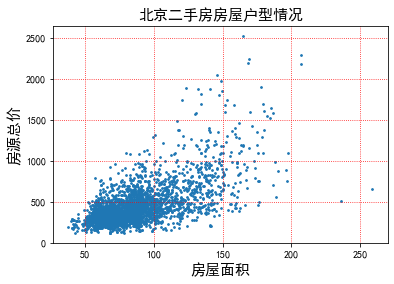

In [16]:
#  绘制总面积和总价的散点关系图
home_area = need_data['总面积'].apply(lambda x:float(x))
# print(home_area.head())
total_price = need_data['总价']
# print(total_price.head())
plt.scatter(home_area,total_price,s=3)
plt.title('北京二手房房屋户型情况',fontsize=15)
plt.xlabel('房屋面积',fontsize=15)
plt.ylabel('房源总价',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.show()

In [17]:
#  分析两个面积大但是价格较低的房源
area_max = home_area.max()
area_max_room_info = need_data[home_area==area_max]
print('二手房面积最大的房源信息为：\n{}'.format(area_max_room_info))

二手房面积最大的房源信息为：
     区/县   区域      小区     总价       单价    房屋户型   楼层     总面积  朝向  建筑结构 装修情况  \
2686  昌平  天通苑  天通苑北二区  660.0  25462.0  3室2厅2卫  低楼层  259.21  南北  钢混结构   其他   

     交易权属    形式 是否满五 产权形式    是否有房本   小区均价  小区建成 总栋数  
2686  商品房  普通住宅  满两年  非共有  已上传房本照片  36621  2004  45  


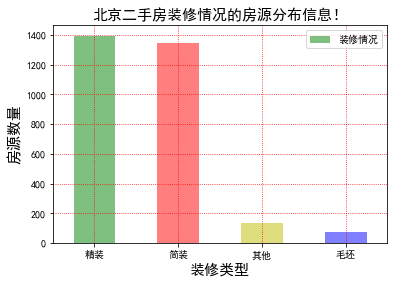

In [70]:
'''
装修情况的房源分布情况！！！
'''
need_data['装修情况'].value_counts().plot(kind='bar',color=['g','r','y','b'],alpha=0.5)
plt.title('北京二手房装修情况的房源分布信息！',fontsize=15)
plt.xlabel('装修类型',fontsize=15)
plt.ylabel('房源数量',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.legend()
plt.xticks(rotation=0)
plt.show()

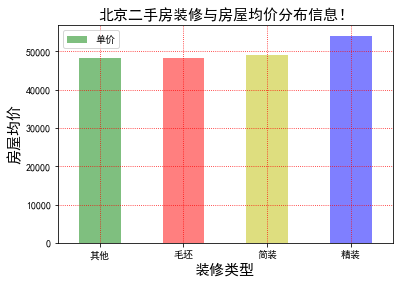

In [19]:
'''
装修情况的均价分布情况！！！
'''
need_data.groupby('装修情况').mean()['单价'].plot(kind='bar',color=['g','r','y','b'],alpha=0.5)
plt.title('北京二手房装修与房屋均价分布信息！',fontsize=15)
plt.xlabel('装修类型',fontsize=15)
plt.ylabel('房屋均价',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [20]:
# 小区均价数据的清洗处理
# 由于小区均价中存在暂无数据的情况，本次使用单价的形式代替房屋均价
need_data = need_data.copy()
need_data['小区均价'] = need_data.apply(lambda x: x['单价'] if ('暂无数据' in str(x['小区均价'])) else x['小区均价'],axis=1)
avg_price = need_data['小区均价'].astype('float')
print('小区均价最高的价格是：{}'.format(avg_price.max()))
print('小区均价最低的价格是：{}'.format(avg_price.min()))

小区均价最高的价格是：162961.0
小区均价最低的价格是：14646.0


In [21]:
# 小区均价最低的房源信息
need_data[need_data['小区均价'].astype('float')==avg_price.min()]

,区/县,区域,小区,总价,单价,房屋户型,楼层,总面积,朝向,建筑结构,装修情况,交易权属,形式,是否满五,产权形式,是否有房本,小区均价,小区建成,总栋数
299,房山,韩村河,韩村河西小区,138.0,16715.1,2室1厅1卫,低楼层,82.56,南北,混合结构,简装,商品房,普通住宅,满五年,非共有,已上传房本照片,14646,1990,8
480,房山,韩村河,韩村河西小区,154.0,14144.0,3室1厅1卫,低楼层,108.88,东南北,混合结构,精装,商品房,普通住宅,暂无数据,共有,已上传房本照片,14646,1990,8


In [22]:
# 小区均价最高的房源信息
need_data[need_data['小区均价'].astype('float')==avg_price.max()]

,区/县,区域,小区,总价,单价,房屋户型,楼层,总面积,朝向,建筑结构,装修情况,交易权属,形式,是否满五,产权形式,是否有房本,小区均价,小区建成,总栋数
359,西城,金融街,京畿道,780.0,78148.5,3室1厅1卫,地下室,99.81,南北,混合结构,其他,商品房,普通住宅,满两年,非共有,已上传房本照片,162961,1990,11


In [23]:
# 将未有小区建成时间的数据字段直接剔除（2个）
need_data[need_data.小区建成=='暂无数据']

,区/县,区域,小区,总价,单价,房屋户型,楼层,总面积,朝向,建筑结构,装修情况,交易权属,形式,是否满五,产权形式,是否有房本,小区均价,小区建成,总栋数
1931,朝阳,望京,望花路西里,260.0,65623.4,1室1厅1卫,高楼层,39.62,东南,混合结构,精装,商品房,普通住宅,满两年,非共有,已上传房本照片,65623.4,暂无数据,暂无数
2527,朝阳,东坝,东泽园,403.0,46611.1,3室1厅1卫,高楼层,86.46,南,钢混结构,精装,限价商品房,普通住宅,满五年,共有,已上传房本照片,46611.1,暂无数据,暂无数


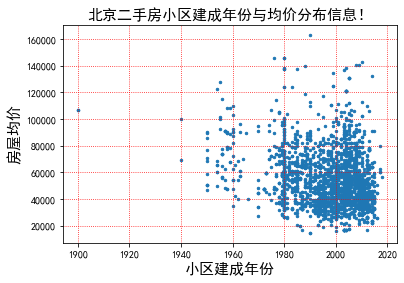

In [24]:
# 剔除小区建成时间为暂无数据的两条数据
try:
    need_data = need_data.drop([1931,2527])
except:
    print('数据已经剔除！！！')
need_data[need_data.小区建成=='暂无数据']
# 将小区建成时间转成日期并仅提取其中的年份
built_year = pd.to_datetime(need_data.小区建成).dt.year
# 绘制小区建成年限与小区均价的散点分布图
plt.scatter(built_year,need_data['小区均价'].astype(float),s=6)
plt.title('北京二手房小区建成年份与均价分布信息！',fontsize=15)
plt.xlabel('小区建成年份',fontsize=15)
plt.ylabel('房屋均价',fontsize=15)
plt.grid(linestyle=":", color="r")
plt.xticks(rotation=0)
plt.show()

In [25]:
# 分析房屋的产权形式（得出结论有两种）
need_data['产权形式'].value_counts()

非共有    2573
共有      375
Name: 产权形式, dtype: int64

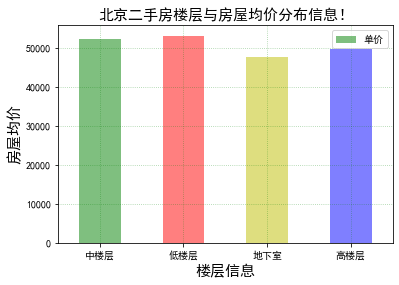

In [55]:
avg_price_louceng = need_louceng_data.groupby('楼层').mean()['单价']
avg_price_louceng.plot(kind='bar',color=['g','r','y','b'],alpha=0.5)
plt.title('北京二手房楼层与房屋均价分布信息！',fontsize=15)
plt.xlabel('楼层信息',fontsize=15)
plt.ylabel('房屋均价',fontsize=15)
plt.grid(linestyle=":", color="g",alpha=0.4)
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [68]:
# 使用pyecharts绘制楼层和房屋数量的饼图
import pyecharts as pye
x = avg_price_louceng.index
y =  avg_price_louceng.values
pie = pye.Pie("房源分布信息")
pie.add("",x,y,is_label_show=True)
pie.render()